In [52]:
import torch
import torchaudio
print(torch.__version__)
print(torchaudio.__version__)

try:
    from pesq import pesq
    from pystoi import stoi
    from torchaudio.pipelines import SQUIM_OBJECTIVE, SQUIM_SUBJECTIVE
except ImportError:
    try:

        import google.colab  # noqa: F401

        print(
            """
            To enable running this notebook in Google Colab, install nightly
            torch and torchaudio builds by adding the following code block to the top
            of the notebook before running it:
            !pip3 uninstall -y torch torchvision torchaudio
            !pip3 install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu
            !pip3 install pesq
            !pip3 install pystoi
            """
        )
    except Exception:
        
        pass
    raise


import matplotlib.pyplot as plt
import torchaudio.functional as F
from IPython.display import Audio
from torchaudio.utils import download_asset


def si_snr(estimate, reference, epsilon=1e-8):
    estimate = estimate - estimate.mean()
    reference = reference - reference.mean()
    reference_pow = reference.pow(2).mean(axis=1, keepdim=True)
    mix_pow = (estimate * reference).mean(axis=1, keepdim=True)
    scale = mix_pow / (reference_pow + epsilon)

    reference = scale * reference
    error = estimate - reference

    reference_pow = reference.pow(2)
    error_pow = error.pow(2)

    reference_pow = reference_pow.mean(axis=1)
    error_pow = error_pow.mean(axis=1)

    si_snr = 10 * torch.log10(reference_pow) - 10 * torch.log10(error_pow)
    return si_snr.item()


def plot(waveform, title, sample_rate=16000):
    wav_numpy = waveform.numpy()

    sample_size = waveform.shape[1]
    time_axis = torch.arange(0, sample_size) / sample_rate

    figure, axes = plt.subplots(2, 1)
    axes[0].plot(time_axis, wav_numpy[0], linewidth=1)
    axes[0].grid(True)
    axes[1].specgram(wav_numpy[0], Fs=sample_rate)
    figure.suptitle(title)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_NOISE = download_asset("tutorial-assets/Lab41-SRI-VOiCES-rm1-babb-mc01-stu-clo.wav")

WAVEFORM_SPEECH, SAMPLE_RATE_SPEECH = torchaudio.load(SAMPLE_SPEECH)
WAVEFORM_NOISE, SAMPLE_RATE_NOISE = torchaudio.load(SAMPLE_NOISE)
WAVEFORM_NOISE = WAVEFORM_NOISE[0:1, :]
file_path = r"C:\Users\cch99\OneDrive\바탕 화면\tts_study\libri tts\LibriTTS\dev-other\116\288045\116_288045_000005_000000.wav"

# 오디오 파일 로드
WAVEFORM_EX = torchaudio.load(file_path)

if SAMPLE_RATE_SPEECH != 16000:
    WAVEFORM_SPEECH = F.resample(WAVEFORM_SPEECH, SAMPLE_RATE_SPEECH, 16000)

if SAMPLE_RATE_NOISE != 16000:
    WAVEFORM_NOISE = F.resample(WAVEFORM_NOISE, SAMPLE_RATE_NOISE, 16000)

if WAVEFORM_SPEECH.shape[1] < WAVEFORM_NOISE.shape[1]:
    WAVEFORM_NOISE = WAVEFORM_NOISE[:, : WAVEFORM_SPEECH.shape[1]]
else:
    WAVEFORM_SPEECH = WAVEFORM_SPEECH[:, : WAVEFORM_NOISE.shape[1]]



2.2.1
2.2.1


RuntimeError: Failed to open the input "C:\Users\cch99\OneDrive\바탕 화면\tts_study\libri tts\LibriTTS\dev-other\116\288045\116_288045_000005_000000.wav" (Protocol not found).
Exception raised from get_input_format_context at /__w/_temp/conda_environment_7964384181/conda-bld/torchaudio_1708371472000/work/src/libtorio/ffmpeg/stream_reader/stream_reader.cpp:42 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x57 (0x7fd404b80d87 in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/site-packages/torch/lib/libc10.so)
frame #1: c10::detail::torchCheckFail(char const*, char const*, unsigned int, std::string const&) + 0x64 (0x7fd404b3175f in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/site-packages/torch/lib/libc10.so)
frame #2: <unknown function> + 0x42904 (0x7fd3fa1bf904 in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/site-packages/torio/lib/libtorio_ffmpeg4.so)
frame #3: torio::io::StreamingMediaDecoder::StreamingMediaDecoder(std::string const&, std::optional<std::string> const&, std::optional<std::map<std::string, std::string, std::less<std::string>, std::allocator<std::pair<std::string const, std::string> > > > const&) + 0x14 (0x7fd3fa1c2304 in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/site-packages/torio/lib/libtorio_ffmpeg4.so)
frame #4: <unknown function> + 0x39cee (0x7fd3684a7cee in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/site-packages/torio/lib/_torio_ffmpeg4.so)
frame #5: <unknown function> + 0x31c24 (0x7fd36849fc24 in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/site-packages/torio/lib/_torio_ffmpeg4.so)
frame #6: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x552b44]
frame #7: _PyObject_MakeTpCall + 0x2fb (0x520d4b in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #8: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x581e3d]
frame #9: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x562936]
frame #10: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x52146b]
frame #11: <unknown function> + 0xf604 (0x7fd404aa2604 in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/site-packages/torchaudio/lib/_torchaudio.so)
frame #12: _PyObject_MakeTpCall + 0x2fb (0x520d4b in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #13: _PyEval_EvalFrameDefault + 0x57c (0x52d15c in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #14: _PyObject_FastCallDictTstate + 0x207 (0x524e57 in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #15: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x5626c4]
frame #16: _PyObject_MakeTpCall + 0x2db (0x520d2b in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #17: _PyEval_EvalFrameDefault + 0x57c (0x52d15c in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #18: PyEval_EvalCode + 0xae (0x5f8a2e in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #19: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x614c29]
frame #20: _PyEval_EvalFrameDefault + 0x3678 (0x530258 in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #21: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x60f917]
frame #22: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x610a36]
frame #23: _PyEval_EvalFrameDefault + 0x4620 (0x531200 in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #24: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x58228a]
frame #25: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x581d65]
frame #26: _PyObject_Call + 0x122 (0x565972 in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #27: _PyEval_EvalFrameDefault + 0x4bbf (0x53179f in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #28: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x60f917]
frame #29: <unknown function> + 0x8362 (0x7fd4229b6362 in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/lib-dynload/_asyncio.cpython-312-x86_64-linux-gnu.so)
frame #30: <unknown function> + 0x8b10 (0x7fd4229b6b10 in /home/cch991112/miniconda3/envs/cch_env/lib/python3.12/lib-dynload/_asyncio.cpython-312-x86_64-linux-gnu.so)
frame #31: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x5514cb]
frame #32: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x688f31]
frame #33: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x4e1bc3]
frame #34: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x546f8e]
frame #35: _PyEval_EvalFrameDefault + 0x4bbf (0x53179f in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #36: PyEval_EvalCode + 0xae (0x5f8a2e in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #37: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x614c29]
frame #38: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x546f8e]
frame #39: PyObject_Vectorcall + 0x51 (0x546cf1 in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #40: _PyEval_EvalFrameDefault + 0x57c (0x52d15c in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #41: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x628b0f]
frame #42: Py_RunMain + 0x3d8 (0x6286c8 in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #43: Py_BytesMain + 0x39 (0x5e4099 in /home/cch991112/miniconda3/envs/cch_env/bin/python)
frame #44: <unknown function> + 0x29d90 (0x7fd424429d90 in /lib/x86_64-linux-gnu/libc.so.6)
frame #45: __libc_start_main + 0x80 (0x7fd424429e40 in /lib/x86_64-linux-gnu/libc.so.6)
frame #46: /home/cch991112/miniconda3/envs/cch_env/bin/python() [0x5e3ece]


In [7]:
Audio(WAVEFORM_SPEECH.numpy()[0], rate=16000)

In [8]:
Audio(WAVEFORM_NOISE.numpy()[0], rate=16000)

In [37]:
snr_dbs = torch.tensor([20, -5])
WAVEFORM_DISTORTED = F.add_noise(WAVEFORM_SPEECH, WAVEFORM_NOISE, snr_dbs)

In [38]:
print(WAVEFORM_SPEECH)
print(WAVEFORM_SPEECH.shape)

tensor([[0.0183, 0.0180, 0.0180,  ..., 0.0018, 0.0019, 0.0032]])
torch.Size([1, 54400])


In [39]:
print(WAVEFORM_NOISE)
print(WAVEFORM_NOISE.shape)

tensor([[0.0004, 0.0016, 0.0027,  ..., 0.0029, 0.0019, 0.0003]])
torch.Size([1, 54400])


In [40]:
print(WAVEFORM_DISTORTED)
print(WAVEFORM_DISTORTED.shape)

tensor([[0.0396, 0.1049, 0.1605,  ..., 0.1591, 0.1051, 0.0212],
        [0.0396, 0.1049, 0.1605,  ..., 0.1591, 0.1051, 0.0212]])
torch.Size([2, 54400])


In [41]:
Audio(WAVEFORM_DISTORTED.numpy()[0], rate=16000)

In [42]:
Audio(WAVEFORM_DISTORTED.numpy()[1], rate=16000)

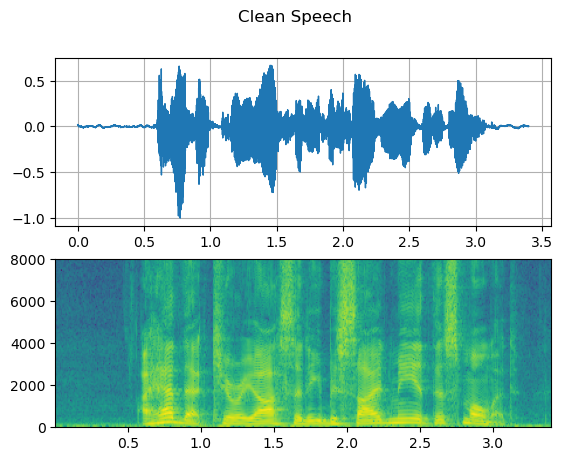

In [ ]:
plot(WAVEFORM_SPEECH, "Clean Speech")

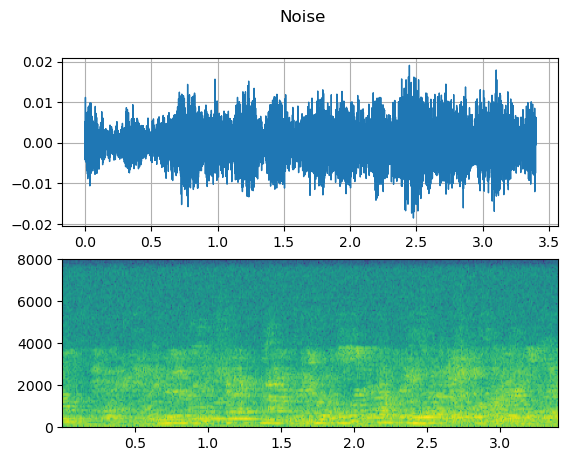

In [ ]:
plot(WAVEFORM_NOISE, "Noise")

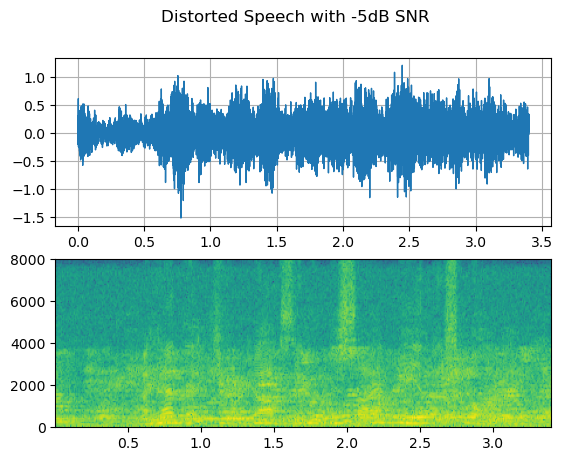

In [45]:
plot(WAVEFORM_DISTORTED[0:1], f"Distorted Speech with {snr_dbs[0]}dB SNR")

In [48]:
print(WAVEFORM_DISTORTED[0])
print(WAVEFORM_DISTORTED[0:1])

tensor([0.0396, 0.1049, 0.1605,  ..., 0.1591, 0.1051, 0.0212])
tensor([[0.0396, 0.1049, 0.1605,  ..., 0.1591, 0.1051, 0.0212]])


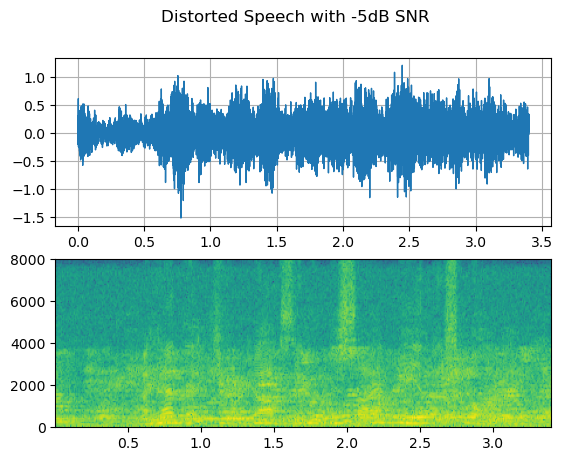

In [ ]:
plot(WAVEFORM_DISTORTED[1:2], f"Distorted Speech with {snr_dbs[1]}dB SNR")

In [ ]:
objective_model = SQUIM_OBJECTIVE.get_model()

Downloading: "https://download.pytorch.org/torchaudio/models/squim_objective_dns2020.pth" to /home/cch991112/.cache/torch/hub/checkpoints/squim_objective_dns2020.pth
100%|██████████| 28.2M/28.2M [00:00<00:00, 48.8MB/s]


In [ ]:
stoi_hyp, pesq_hyp, si_sdr_hyp = objective_model(WAVEFORM_DISTORTED[0:1, :])
print(f"Estimated metrics for distorted speech at {snr_dbs[0]}dB are\n")
print(f"STOI: {stoi_hyp[0]}")
print(f"PESQ: {pesq_hyp[0]}")
print(f"SI-SDR: {si_sdr_hyp[0]}\n")

pesq_ref = pesq(16000, WAVEFORM_SPEECH[0].numpy(), WAVEFORM_DISTORTED[0].numpy(), mode="wb")
stoi_ref = stoi(WAVEFORM_SPEECH[0].numpy(), WAVEFORM_DISTORTED[0].numpy(), 16000, extended=False)
si_sdr_ref = si_snr(WAVEFORM_DISTORTED[0:1], WAVEFORM_SPEECH)
print(f"Reference metrics for distorted speech at {snr_dbs[0]}dB are\n")
print(f"STOI: {stoi_ref}")
print(f"PESQ: {pesq_ref}")
print(f"SI-SDR: {si_sdr_ref}")

Estimated metrics for distorted speech at 20dB are

STOI: 0.9610356092453003
PESQ: 2.7801527976989746
SI-SDR: 20.6926326751709

Reference metrics for distorted speech at 20dB are

STOI: 0.9670831113894452
PESQ: 2.7961528301239014
SI-SDR: 19.998966217041016


In [ ]:
stoi_hyp, pesq_hyp, si_sdr_hyp = objective_model(WAVEFORM_DISTORTED[1:2, :])
print(f"Estimated metrics for distorted speech at {snr_dbs[1]}dB are\n")
print(f"STOI: {stoi_hyp[0]}")
print(f"PESQ: {pesq_hyp[0]}")
print(f"SI-SDR: {si_sdr_hyp[0]}\n")

pesq_ref = pesq(16000, WAVEFORM_SPEECH[0].numpy(), WAVEFORM_DISTORTED[1].numpy(), mode="wb")
stoi_ref = stoi(WAVEFORM_SPEECH[0].numpy(), WAVEFORM_DISTORTED[1].numpy(), 16000, extended=False)
si_sdr_ref = si_snr(WAVEFORM_DISTORTED[1:2], WAVEFORM_SPEECH)
print(f"Reference metrics for distorted speech at {snr_dbs[1]}dB are\n")
print(f"STOI: {stoi_ref}")
print(f"PESQ: {pesq_ref}")
print(f"SI-SDR: {si_sdr_ref}")

Estimated metrics for distorted speech at -5dB are

STOI: 0.5743247270584106
PESQ: 1.1112866401672363
SI-SDR: -6.2487406730651855

Reference metrics for distorted speech at -5dB are

STOI: 0.5848137931588825
PESQ: 1.0803768634796143
SI-SDR: -5.016279220581055


In [ ]:
subjective_model = SQUIM_SUBJECTIVE.get_model()

Downloading: "https://download.pytorch.org/torchaudio/models/squim_subjective_bvcc_daps.pth" to /home/cch991112/.cache/torch/hub/checkpoints/squim_subjective_bvcc_daps.pth
100%|██████████| 360M/360M [00:17<00:00, 21.2MB/s] 


In [ ]:
NMR_SPEECH = download_asset("tutorial-assets/ctc-decoding/1688-142285-0007.wav")

WAVEFORM_NMR, SAMPLE_RATE_NMR = torchaudio.load(NMR_SPEECH)
if SAMPLE_RATE_NMR != 16000:
    WAVEFORM_NMR = F.resample(WAVEFORM_NMR, SAMPLE_RATE_NMR, 16000)

100%|██████████| 441k/441k [00:00<00:00, 651kB/s] 


In [ ]:
mos = subjective_model(WAVEFORM_DISTORTED[0:1, :], WAVEFORM_NMR)
print(f"Estimated MOS for distorted speech at {snr_dbs[0]}dB is MOS: {mos[0]}")

Estimated MOS for distorted speech at 20dB is MOS: 4.309267997741699


In [ ]:
mos = subjective_model(WAVEFORM_DISTORTED[1:2, :], WAVEFORM_NMR)
print(f"Estimated MOS for distorted speech at {snr_dbs[1]}dB is MOS: {mos[0]}")

Estimated MOS for distorted speech at -5dB is MOS: 3.2918035984039307
